In [1]:
from numpy import *
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import TSNE

In [2]:
# 欧式距离
def calDistance(x1, x2):
    return linalg.norm(x1 - x2)

In [3]:
# 生成随机聚类中心
def initCentroids(dataSet, k):
    n = shape(dataSet)[1]
    clustercents = mat(zeros((k, n)))  # 初始化聚类中心矩阵：k * n
    for col in range(n):
        mincol = min(dataSet[:, col])
        maxcol = max(dataSet[:, col])

        # randoom.rand（k, 1）：产生一个0-1之间的随机数向量；K， 1表示产生k行1列的随机数
        clustercents[:, col] = mat(mincol + float(maxcol - mincol) * random.rand(k, 1))
    return clustercents

In [4]:
def KMeans(dataSet, k):
    m = shape(dataSet)[0]
    # 与数据集等长，共两列，第一列：数据集对应的聚类中心k；第二列：数据集到聚类中心的距离
    ClustDist = mat(zeros((m, 2)))

    clustercents = initCentroids(dataSet, k)
    # 标志位
    flag = True
    while flag:
        flag = False
        for i in range(m):
            distlist = [calDistance(clustercents[j, :], dataSet[i, :]) for j in range(k)]
            minDist = min(distlist)
            minIndex = distlist.index(minDist)

            if ClustDist[i, 0] != minIndex:
                flag = True
            ClustDist[i, :] = minIndex, minDist

        for cent in range(k):
            ptsInClust = dataSet[nonzero(ClustDist[:, 0].A == cent)[0]]
            clustercents[cent, :] = mean(ptsInClust, axis=0)

    return clustercents, ClustDist

In [5]:
def show(dataSet, k, clustercents, ClustDist):
    numSamples, _ = shape(dataSet)
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    for i in range(numSamples):
        markIndex = int(ClustDist[i, 0])
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
    for i in range(k):
        plt.plot(clustercents[i, 0], clustercents[i, 1], mark[i], markersize=12)
    plt.show()

Extracting ./data/fashion/train-images-idx3-ubyte.gz
Extracting ./data/fashion/train-labels-idx1-ubyte.gz
Extracting ./data/fashion/t10k-images-idx3-ubyte.gz
Extracting ./data/fashion/t10k-labels-idx1-ubyte.gz


/home/lixinsong/.virtualenvs/tensflow_env/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/lixinsong/.virtualenvs/tensflow_env/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[[ -1.29075956  -1.2766099 ]
 [  4.8211441   -7.63081551]
 [         nan          nan]
 [ -2.98474908  -8.04167175]
 [ -7.5382061    9.80176926]
 [ 12.02682304  -1.86831355]
 [ -6.34873152   2.60921502]
 [         nan          nan]
 [  6.51447248   0.28332227]
 [ -2.89417028  10.50780678]]


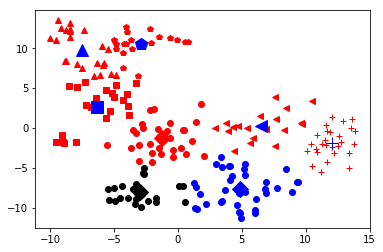

In [6]:
def main():
    mnist = input_data.read_data_sets('./data/fashion', one_hot=True)
    train_images = mnist.train.images
    # print(train_images)
    dataMat = TSNE().fit_transform(train_images[:200])
    
    myCentroids, ClustDist = KMeans(dataMat, 10)
    print(myCentroids)
    show(dataMat, 10, myCentroids, ClustDist)


if __name__ == '__main__':
    main()